In [1]:
import pandas as pd
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [3]:
# manashvi 
df.rename(columns={'medv':'Price'},inplace = True)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


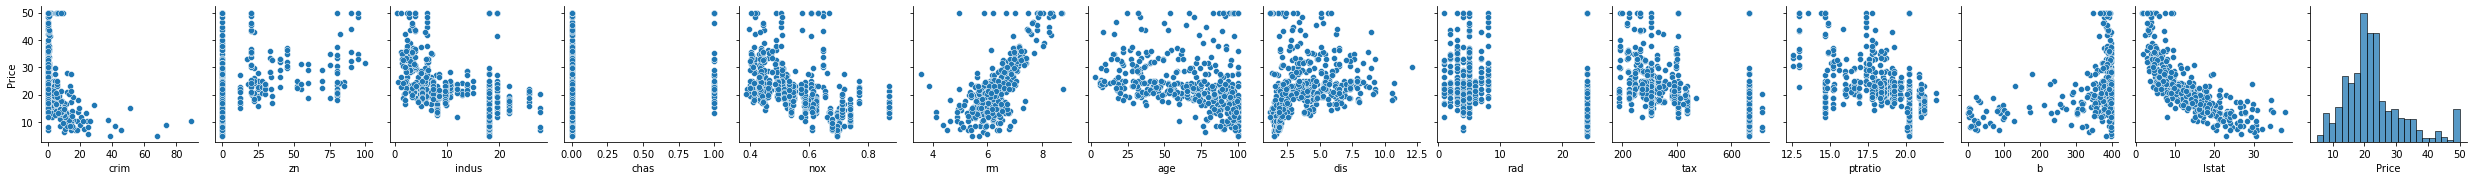

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,y_vars='Price')

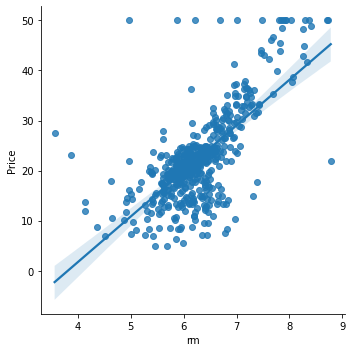

In [6]:
sns.lmplot(x='rm',y='Price',data=df)

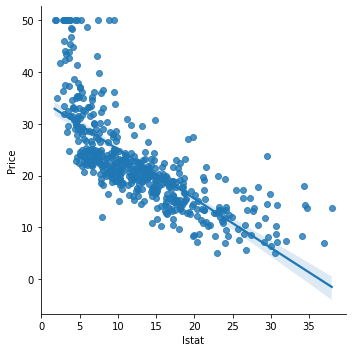

In [7]:
sns.lmplot(x='lstat',y='Price',data=df)

In [8]:
#rrm and lstat shows linear relationship with Price
from sklearn.model_selection import train_test_split
X = df[['rm','lstat']]
y = df[['Price']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
y_test_pred = lr.predict(x_test)

In [11]:
from sklearn import metrics
import numpy as np
print("MAE : ",metrics.mean_absolute_error(y_test,y_test_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_test_pred))
print("MSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE :  3.975932001192901
MSE :  26.08773038179283
MSE :  5.107614940634506


In [30]:
lr.score(x_test,y_test)

0.6059870792089477